In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

deliveries = pd.read_csv("/content/cleaned_deliveries.csv")
matches = pd.read_csv("/content/cleaned_matches (1).csv")

In [4]:
batting_stats = deliveries.groupby('batter').agg(
    runs_scored=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count'),
    fours=('batsman_runs', lambda x: (x==4).sum()),
    sixes=('batsman_runs', lambda x: (x==6).sum()),
    dismissals=('player_dismissed', lambda x: x.notnull().sum())
).reset_index()

In [5]:

batting_stats['strike_rate'] = (batting_stats['runs_scored'] / batting_stats['balls_faced']) * 100
batting_stats['batting_average'] = batting_stats['runs_scored'] / batting_stats['dismissals'].replace(0, 1)
batting_stats['boundary_percentage'] = ((batting_stats['fours'] + batting_stats['sixes']) / batting_stats['balls_faced']) * 100

In [6]:
batting_stats.head()


,batter,runs_scored,balls_faced,fours,sixes,dismissals,strike_rate,batting_average,boundary_percentage
0,A Ashish Reddy,280,196,16,15,196,142.857143,1.428571,15.816327
1,A Badoni,634,505,46,24,505,125.544554,1.255446,13.861386
2,A Chandila,4,7,0,0,7,57.142857,0.571429,0.000000
3,A Chopra,53,75,7,0,75,70.666667,0.706667,9.333333
4,A Choudhary,25,20,1,1,20,125.000000,1.250000,10.000000


In [8]:
features = ['strike_rate', 'batting_average', 'boundary_percentage']
X = batting_stats[features]

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
batting_stats['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

In [11]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

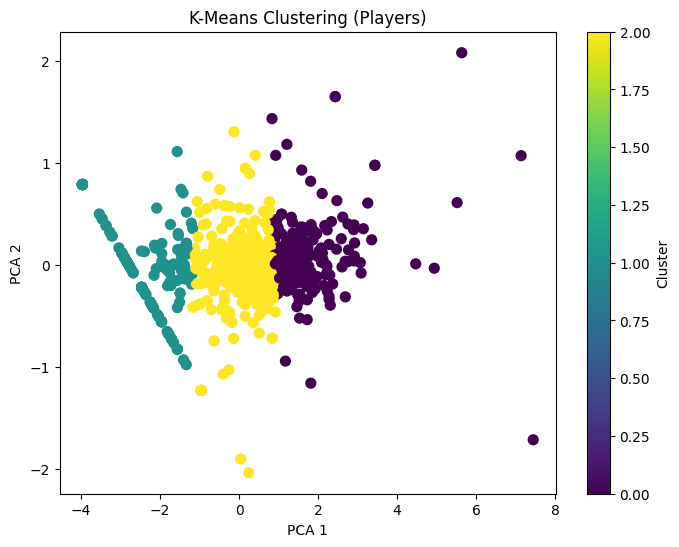

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=batting_stats['KMeans_Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering (Players)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()